## Notebook for comparing DFT & ML predictions for expt validated compounds

**Modified on 3rd March, 2023; remodified on 23rd Feb, 2024**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.metrics import mean_squared_error
from rdkit.Chem import AllChem, DataStructs, PandasTools
from rdkit import Chem

In [3]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/expt-data/oxstab
total 6808
-rw-r--r--@ 1 riteshk  staff    39115 Feb 16 14:09 Canh_data_LSV_TFSI_ESF.xlsx
-rw-r--r--@ 1 riteshk  staff    24838 Feb 16 14:14 Canh_data_LSV_TFSI_ESF.csv
-rw-------@ 1 riteshk  staff   215412 Feb 16 14:17 latest_Canh_data_EIS_LSV_CE.xlsx
-rw-r--r--@ 1 riteshk  staff    34921 Feb 17 16:55 lsv_allfive_021723.eps
-rw-r--r--@ 1 riteshk  staff    36029 Feb 17 16:56 lsv_allfive_zoom_021723.eps
-rw-------@ 1 riteshk  staff  1342697 Feb 17 16:56 plot-lsv-data.ipynb
-rw-------@ 1 riteshk  staff    92063 Feb 23 12:28 compare-dft-ml-expt-oxstab.ipynb
-rw-------@ 1 riteshk  staff   842752 Feb 23 12:30 emol_expt_measured.xls
-rw-------@ 1 riteshk  staff   843776 Feb 23 12:48 emol_expt_measured_072723.xls


In [4]:
df = pd.read_excel('emol_expt_measured_022324.xls', sheet_name='emol_expt_measured')
df

,solv_comb_sm,cond_chemprop_25,Eox_chemprop,Eox_chemprop_new,Eox_chemprop_new_uncer,CE_RF,CE_PLSR,Eox_chemprop_uncer,similarity_cond,similarity_ie,...,Eox_DFT,Eox_DFT_new,Eox_expt,Eox_expt_uncer,CE_expt,CE_expt_uncer,name,short_name,prod_id,vendor
0,CCN1CCOCC1,5.765277,4.039314,NaN,NaN,0.982527,NaN,0.012533,NaN,NaN,...,3.817373,NaN,3.70,0.180000,0.7155,0.021100,1 M LiFSA/EM,mol1,A11905,Alfa Aesar
1,COC(=O)C#N,10.097790,8.007362,NaN,NaN,0.987326,NaN,0.121483,0.388889,NaN,...,7.852463,NaN,3.50,0.210000,0.0530,0.011300,1 M LiFSA/MCF,mol2,319813,Sigma Aldrich
2,CCOCCS(F)(=O)=O,2.001988,6.694301,NaN,NaN,0.986423,NaN,0.013183,NaN,NaN,...,6.191821,NaN,4.50,0.170000,0.8890,0.016500,1 M LiFSA/EESF,mol4,E300-6402,Enamine
3,CCS(F)(=O)=O,3.801026,7.330647,NaN,NaN,0.986624,NaN,0.050609,NaN,NaN,...,7.956790,NaN,4.20,0.240000,0.9941,0.013200,1 M LiFSA/ESF,mol3,E300-5313,Enamine
4,CCN1CCOCC1,NaN,NaN,3.867303,0.005669,0.982527,0.972619,NaN,NaN,NaN,...,NaN,4.0945,5.42,0.040000,0.8524,0.015947,2 M LiFSA/EM,mol1,A11905,Alfa Aesar
5,CCOCCS(F)(=O)=O,NaN,NaN,6.861181,0.035119,0.986423,0.988739,NaN,NaN,NaN,...,NaN,6.4362,6.00,0.196554,0.9439,0.008108,2 M LiFSA/EESF,mol4,E300-6402,Enamine
6,CCS(F)(=O)=O,NaN,NaN,7.197885,0.033114,0.986624,0.993486,NaN,NaN,NaN,...,NaN,7.9656,6.00,0.133167,0.9952,0.002300,2 M LiFSA/ESF,mol3,E300-5313,Enamine


In [8]:
dft_oxstab = df['Eox_DFT_new'].iloc[4:]
ml_oxstab = df['Eox_chemprop_new'].iloc[4:]
ml_oxstab_unc = df['Eox_chemprop_new_uncer'].iloc[4:]
expt_oxstab = df['Eox_expt'].iloc[4:]
expt_oxstab_unc = df['Eox_expt_uncer'].iloc[4:]

In [12]:
error_dft_ml = abs(dft_oxstab - ml_oxstab)
error_dft_ml

4    0.227197
5    0.424981
6    0.767715
dtype: float64

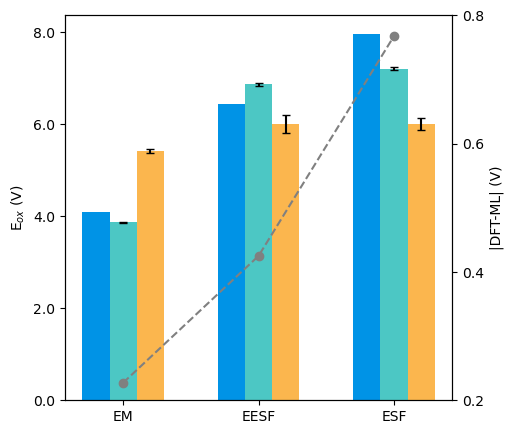

In [21]:
# Set position of bar on X axis
barWidth = 0.2
fig, ax = plt.subplots(figsize=(5,5))
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
ax.bar(br1, dft_oxstab, width=barWidth, label='DFT', color=(0, 0.576, 0.902))  ## DFT
ax.bar(br2, ml_oxstab, width=barWidth, label='ML', color=(0.298, 0.78, 0.77), yerr=ml_oxstab_unc, capsize=3) ## ML
ax.bar(br3, expt_oxstab, width=barWidth, label='Experiments', color=(0.984, 0.713, 0.305), yerr=expt_oxstab_unc, capsize=3) ## Expt
# ax.set_aspect(aspect=4)
# plt.legend()
plt.ylabel('E$_{ox}$ (V)')
plt.xticks([r + barWidth for r in range(3)],
        ['EM', 'EESF', 'ESF'])

ax2 = ax.twinx()
ax2.scatter(br2, error_dft_ml, color='grey', label='Error (DFT-ML)')
ax2.plot(br2, error_dft_ml, color='grey', linestyle='dashed')
ax2.set_ylabel('|DFT-ML| (V)')
ax2.set_yticks([0.2, 0.4, 0.6, 0.8])
ax2.set_yticklabels([0.2, 0.4, 0.6, 0.8])

ax.set_yticks([0.0, 2.0, 4.0, 6.0, 8.0])
ax.set_yticklabels([0.0, 2.0, 4.0, 6.0, 8.0])
# plt.show()
plt.savefig('oxstab_expt-ml-dft_li_al_main_022324.eps', dpi=300)